In [16]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.python.keras.applications.efficientnet import EfficientNetB5



In [17]:
path = r'C:\\Users\\koksoymdphd\\Downloads\\'

In [18]:
df = pd.read_csv(path + 'train.csv', sep=",")

In [19]:
df

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


<AxesSubplot:>

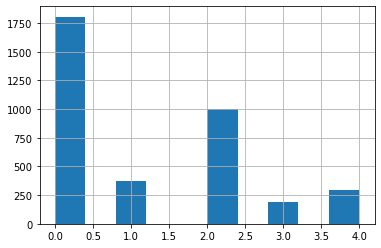

In [6]:
df['diagnosis'].hist()

In [7]:
df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [8]:
df2 = df.copy()

In [9]:
sorted_df = df2.sort_values(by=['diagnosis'])

In [10]:
sorted_df

,id_code,diagnosis
2478,abe940882578,0
1409,62b4be2799ca,0
2972,ce754234d760,0
1406,6294b378d09f,0
1405,628b581aa905,0
...,...,...
1818,80964d8e0863,4
3414,ed3a0fc5b546,4
2164,9859e2a6cc24,4
3410,ed246ae1ed08,4


In [20]:
files = os.listdir(path+ 'train_images')

In [19]:
img_list = []

for i in files[0:20]:
    image = cv2.imread(path+ 'train_images\\'+ i )
    image = cv2.resize(image,(400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_list.append(image)

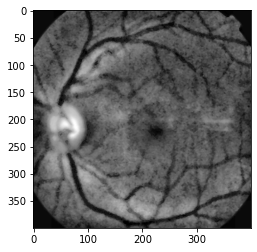

In [51]:
copy = img_list[4].copy()
copy = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)
plt.imshow(copy, cmap='gray')

In [52]:
blur1= cv2.GaussianBlur(copy,(5,5),sigmaX=5, sigmaY=5)

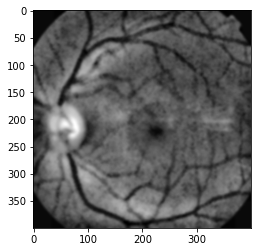

In [53]:
plt.imshow(blur1, cmap='gray')

In [54]:
blur2 =cv2.GaussianBlur(copy,(5,5),sigmaX=1, sigmaY=1)

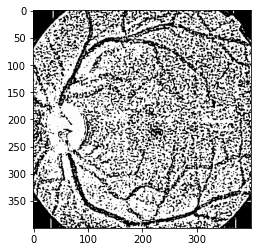

In [55]:
dif = blur1-blur2
plt.imshow(dif, cmap='gray')

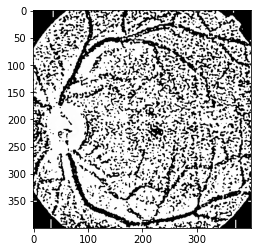

In [56]:
medbl=cv2.medianBlur(dif, 3)
plt.imshow(medbl, cmap='gray')

In [53]:
ret, thresh = cv2.threshold(blur1, 10, 255, cv2.THRESH_BINARY)

In [55]:
thresh = cv2.threshold(blur1, 10, 255, cv2.THRESH_BINARY)[1]

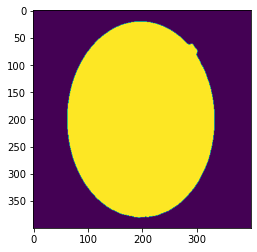

In [56]:
plt.imshow(thresh)

In [65]:
#contour is an array of 3D, it needs to be flat

contour1 = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [66]:
# contour1

In [67]:
contour2 = contour1[0][0]
contour2.shape

(458, 1, 2)

In [68]:
# contour2

In [69]:
contour = contour2[:,0,:]

In [70]:
contour

array([[186,  21],
       [185,  22],
       [180,  22],
       [179,  23],
       [175,  23],
       [174,  24],
       [171,  24],
       [170,  25],
       [167,  25],
       [166,  26],
       [164,  26],
       [163,  27],
       [161,  27],
       [160,  28],
       [159,  28],
       [158,  29],
       [157,  29],
       [156,  30],
       [154,  30],
       [153,  31],
       [152,  31],
       [151,  32],
       [150,  32],
       [149,  33],
       [148,  33],
       [147,  34],
       [146,  34],
       [144,  36],
       [143,  36],
       [142,  37],
       [141,  37],
       [139,  39],
       [138,  39],
       [135,  42],
       [134,  42],
       [132,  44],
       [131,  44],
       [128,  47],
       [127,  47],
       [122,  52],
       [121,  52],
       [113,  60],
       [113,  61],
       [106,  68],
       [106,  69],
       [103,  72],
       [103,  73],
       [ 99,  77],
       [ 99,  78],
       [ 97,  80],
       [ 97,  81],
       [ 95,  83],
       [ 95,

In [71]:
contour[:,0].argmax()

339

In [72]:
contour[339]

array([332, 220], dtype=int32)

In [73]:
contour[:,0].argmin()

111

In [74]:
left = tuple(contour[contour[:,0].argmin()])
right = tuple(contour[contour[:,0].argmax()])
top= tuple(contour[contour[:,1].argmin()])
bottom = tuple(contour[contour[:,1].argmax()])

In [75]:
left, right, top, bottom

((63, 181), (332, 220), (186, 21), (192, 380))

In [77]:
x1=left[0]
y1=top[1]
x2=right[0]
y2=bottom[1]

In [78]:
x1, y1, x2, y2

(63, 21, 332, 380)

In [81]:
orig_copy = img_list[4].copy()

In [88]:
crop1 = orig_copy[y1:y2, x1:x2]

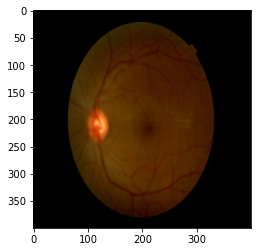

In [89]:
plt.imshow(orig_copy)

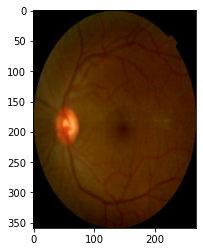

In [90]:
plt.imshow(crop1)

In [91]:
crop1r = cv2.resize(crop1,(400,400))

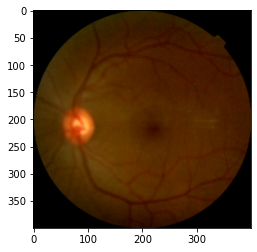

In [92]:
plt.imshow(crop1r)

In [ ]:
#slicing the corners kenar kirpma

In [93]:
x=int(x2-x1)*4//100
y=int(y2-y1)*5//100

In [94]:
x,y

(10, 17)

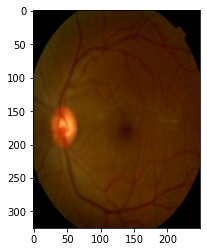

In [96]:
crop_lst = orig_copy[y1+y:y2-y, x1+x:x2-x]
plt.imshow(crop_lst)

In [97]:
croplstr = cv2.resize(crop_lst,(400,400))

In [98]:
lab = cv2.cvtColor(croplstr, cv2.COLOR_RGB2LAB)

In [99]:
L,A,B = cv2.split(lab)

In [100]:
L.shape

(400, 400)

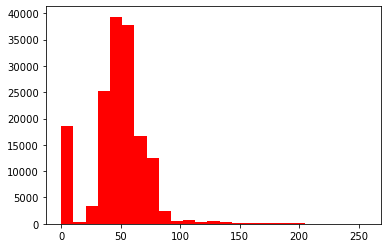

In [106]:
fltn = L.flatten()
plt.hist(fltn, 25, [0,256], color='r')
plt.show()

In [114]:
# clahe = cv2.createCLAHE(contrast limit, frame size)
# clahe.apply(img)

clahe= cv2.createCLAHE(clipLimit=7.0, tileGridSize=((8,8)))
cl = clahe.apply(L)

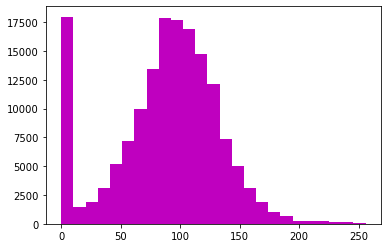

In [115]:
plt.hist(cl.flatten(), 25, [0,256], color='m')
plt.show()

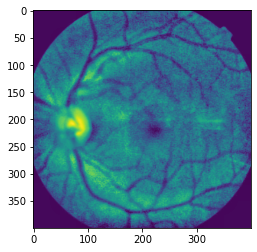

In [116]:
plt.imshow(cl)

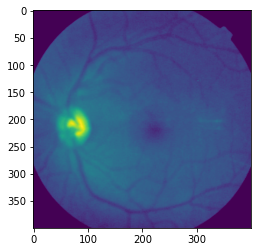

In [117]:
plt.imshow(L)

In [118]:
# cv2.merge needs 2 brackets
limg= cv2.merge((cl,A,B))

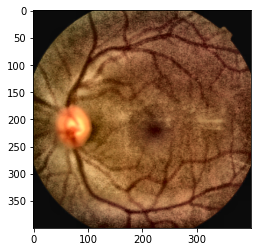

In [121]:
final_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
plt.imshow(final_img)

In [124]:
last_img = cv2.medianBlur(final_img, 3)

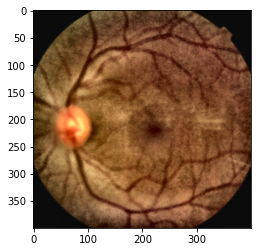

In [125]:
plt.imshow(last_img)

In [126]:
backg = cv2.medianBlur(final_img, 37)

In [131]:
# join 2 imgs by addWeighted(img1, ratio1, img2, ratio2, gamma)
mask = cv2.addWeighted(last_img, 1, backg, -1,255)

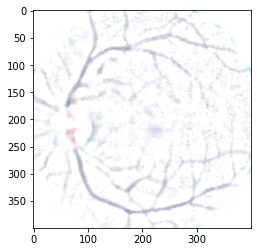

In [132]:
plt.imshow(mask)

In [133]:
end_img = cv2.bitwise_and(mask,last_img )

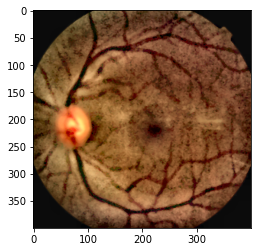

In [135]:
plt.imshow(end_img)

In [27]:
img_list = []

# from tqdm import tqdm_notebook as tqdm

for i in (files):
    image = cv2.imread(path + 'train_images\\'+i)
    image = cv2.resize(image,(400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    kopy = image.copy()
    kopy = cv2.cvtColor(kopya, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(kopy,(5,5),0)
    thresh = cv2.threshold(blur,10,255, cv2.THRESH_BINARY)[1]
    kontur = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    kontur = kontur[0][0]
    kontur = kontur[:,0,:]
    x1 = tuple(kontur[kontur[:,0].argmin()])[0]
    y1 = tuple(kontur[kontur[:,1].argmin()])[1]
    x2 = tuple(kontur[kontur[:,0].argmax()])[0]
    y2 = tuple(kontur[kontur[:,1].argmax()])[1]
    x = int(x2-x1)*4//50
    y = int(y2-y1)*5//50
    kopy2 = image.copy()
    if x2-x1 >100 and y2-y1> 100:
        kopy2 = kopy2[y1+y : y2-y , x1+x : x2-x]
        kopy2 = cv2.resize(kopy2,(400,400))
    lab = cv2.cvtColor(kopy2, cv2.COLOR_RGB2LAB)
    l,a,b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0,tileGridSize=((8,8)))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    last = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    median_last = cv2.medianBlur(last, 3)
    bckg = cv2.medianBlur(last, 37)
    mask = cv2.addWeighted(median_last,1,bckg,-1,255)
    fin_img = cv2.bitwise_and(mask,median_last)
    img_list.append(fin_img)

In [ ]:
img_list

In [ ]:
fig = plt.figure(figsize=(20,12))

for i in range(12):
    img = img_list[i]
    fig.add_subplot(3,4,i+1)
    plt.imshow(img)

plt.tight_layout()

In [11]:
df['diagnosis']

0       2
1       4
2       1
3       0
4       0
       ..
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int64

In [21]:
y_train = pd.get_dummies(df['diagnosis']).values

In [22]:
y_train

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [23]:
y_train_son = np.ones(y_train.shape, dtype='uint8')

In [24]:
y_train_son[:,4] = y_train[:,4]

In [25]:
for i in range(3,-1,-1):
    y_train_son[:,i] = np.logical_or(y_train[:,i], y_train_son[:,i+1])

In [28]:
x_train = np.array(img_list)

In [29]:
x_train.shape

(3662, 400, 400, 3)

In [30]:
y_train_son.shape

(3662, 5)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_val , y_train, y_val = train_test_split(x_train,
                                                   y_train_son,
                                                   test_size=0.15,
                                                   random_state=2019,
                                                   shuffle=True)

In [32]:
x_train.shape, x_val.shape , y_train.shape, y_val.shape

((3112, 400, 400, 3), (550, 400, 400, 3), (3112, 5), (550, 5))

In [33]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
data_generator = datagen.flow(x_train,y_train,batch_size=2,seed=2020)

In [34]:
smpmodel=EfficientNetB5()

123469824/123465288 [==============================] - 3s 0us/step


In [35]:
smpmodel.summary()

Model: "efficientnetb5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 456, 456, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 456, 456, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 456, 456, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 457, 457, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [44]:
smpmodel = EfficientNetB5(include_top=False)
model.summary()

Model: "efficientnetb5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 456, 456, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 456, 456, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 456, 456, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 457, 457, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [45]:
from keras.models import Sequential
from keras import layers

model= Sequential()
model.add(EfficientNetB5(weights='imagenet',include_top=False, input_shape=(400,400,3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5,activation = 'sigmoid'))

In [46]:
from keras.optimizers import Adam

In [47]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.00005),metrics=['accuracy'])

In [48]:
from keras.callbacks import ReduceLROnPlateau

lr = ReduceLROnPlateau(monitor = 'val_loss',
                      patience = 3,
                      verbose = 1,
                      mode='auto',
                      factor=0.25,
                      min_lr=0.000001)

In [49]:
history = model.fit_generator(data_generator,
                             steps_per_epoch = 1000,
                             epochs = 5,
                             validation_data = (x_val,y_val),
                             callbacks = [lr])

Epoch 1/5
 155/1000 [===>..........................] - ETA: 38:07 - loss: 0.4847 - accuracy: 0.9226

KeyboardInterrupt: 